In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
from astropy.io import fits
from astropy.table import Table
import pcmdpy as ppy
import easydarkfigs
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
%matplotlib inline

In [2]:
import os, shutil
from glob import glob

In [3]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [4]:
counts = defaultdict(int)
for infile in sorted(glob(os.path.join('../data/M87/raw/', 'j*_flc.fits'))):
    filt = fits.getval(infile, 'FILTER1')
    if 'CLEAR' in filt:
        filt = fits.getval(infile, 'FILTER2')
    targ = fits.getval(infile, 'TARGNAME')
    counts[filt] += 1
    newname = f'../data/M87/raw/M87_{filt:s}_EXP{counts[filt]:d}_flc.fits'
    if os.path.isfile(newname):
        raise FileExistsError(f'{newname} exists')
    os.rename(infile, newname)

In [5]:
vals = {}
for f in sorted(glob('../data/M87/raw/M87_F814W_EXP*_flc.fits')):
    asn = fits.getval(f, 'asn_id')
    if asn not in vals:
        vals[asn] = []
    vals[asn].append(f)

In [6]:
vals

{'J9E007010': ['../data/M87/raw/M87_F814W_EXP1_flc.fits',
  '../data/M87/raw/M87_F814W_EXP2_flc.fits',
  '../data/M87/raw/M87_F814W_EXP3_flc.fits',
  '../data/M87/raw/M87_F814W_EXP4_flc.fits'],
 'J9E015010': ['../data/M87/raw/M87_F814W_EXP5_flc.fits',
  '../data/M87/raw/M87_F814W_EXP6_flc.fits',
  '../data/M87/raw/M87_F814W_EXP7_flc.fits',
  '../data/M87/raw/M87_F814W_EXP8_flc.fits'],
 'J9E023010': ['../data/M87/raw/M87_F814W_EXP10_flc.fits',
  '../data/M87/raw/M87_F814W_EXP11_flc.fits',
  '../data/M87/raw/M87_F814W_EXP12_flc.fits',
  '../data/M87/raw/M87_F814W_EXP9_flc.fits'],
 'J9E031010': ['../data/M87/raw/M87_F814W_EXP13_flc.fits',
  '../data/M87/raw/M87_F814W_EXP14_flc.fits',
  '../data/M87/raw/M87_F814W_EXP15_flc.fits',
  '../data/M87/raw/M87_F814W_EXP16_flc.fits'],
 'J9E039010': ['../data/M87/raw/M87_F814W_EXP17_flc.fits',
  '../data/M87/raw/M87_F814W_EXP18_flc.fits',
  '../data/M87/raw/M87_F814W_EXP19_flc.fits',
  '../data/M87/raw/M87_F814W_EXP20_flc.fits'],
 'J9E047010': ['../

In [7]:
vals = {}
for f in sorted(glob('../data/M87/raw/M87_F606W_EXP*_flc.fits')):
    asn = fits.getval(f, 'ROOTNAME')
    if asn not in vals:
        vals[asn] = []
    vals[asn].append(f)

In [8]:
vals

{'j9e007lwq': ['../data/M87/raw/M87_F606W_EXP1_flc.fits'],
 'j9e015iyq': ['../data/M87/raw/M87_F606W_EXP2_flc.fits'],
 'j9e023llq': ['../data/M87/raw/M87_F606W_EXP3_flc.fits'],
 'j9e031ndq': ['../data/M87/raw/M87_F606W_EXP4_flc.fits'],
 'j9e039m9q': ['../data/M87/raw/M87_F606W_EXP5_flc.fits'],
 'j9e047onq': ['../data/M87/raw/M87_F606W_EXP6_flc.fits'],
 'j9e094giq': ['../data/M87/raw/M87_F606W_EXP7_flc.fits']}

In [9]:
vals = {}
for f in sorted(glob('../data/M87/raw/M87_F475W_EXP*_flc.fits')):
    asn = fits.getval(f, 'asn_id')
    if asn not in vals:
        vals[asn] = []
    vals[asn].append(f)

In [10]:
vals

{'J8FS02020': ['../data/M87/raw/M87_F475W_EXP1_flc.fits',
  '../data/M87/raw/M87_F475W_EXP2_flc.fits']}

In [11]:
files = {'F475W': ['../data/M87/raw/M87_F475W_EXP{:d}_flc.fits'.format(i) for i in range(1, 3)],
#          'F606W': ['../data/M87/raw/M87_F606W_EXP{:d}_flc.fits'.format(i) for i in range(1, 7)],
         'F814W': ['../data/M87/raw/M87_F814W_EXP{:d}_flc.fits'.format(i) for i in range(1, 9)]}
outputs = {'F475W': '../data/M87_v2/reduced/M87_F475W_drc.fits',
#           'F606W': '../data/M87/reduced/M87_F606W_drc.fits',
          'F814W': '../data/M87_v2/reduced/M87_F814W_drc.fits'}
diff_im = '../data/M87_v2/reduced/M87_g-I.fits'
darks = {}

In [12]:
from drizzlepac import tweakreg

# Alignment and Drizzling

In [13]:
os.environ['jref'] = '/Users/bcook/pCMDs/pixcmd/data/M87_v2/calibration/'

In [14]:
%%time
ppy.data.alignment.drizzle_many(files, outputs, reference_filter='F814W', verbose=True, realign_only=False)

*******************************
Initial Alignment and Drizzling
--F814W: Aligning
{'conv_width': 4.0, 'threshold': 200, 'shiftfile': False, 'updatehdr': True, 'writecat': False, 'clean': True, 'residplot': 'NoPlot', 'see2dplot': False, 'reusename': True, 'interactive': False, 'updatewcs': False, 'enforce_user_order': True, 'expand_refcat': True, 'wcsname': 'INITIAL_F814W', 'refimage': ''}
Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 12:10:04.212 (11/04/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F814W_EXP1_flc.fits
    /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F814W_EXP2_flc.fits
    /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F814W_EXP3_flc.fits
    /Users/bco

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]



Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP1_flc.fits['SCI',1]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP1_flc.fits[1]
WCS Keywords

CD_11  CD_12: -4.136892194211644e-07 -1.3965875547548382e-05
CD_21  CD_22: -1.3842837222533435e-05 -5.438808936372671e-07
CRVAL    : 187.72684650696442 12.39210566809996
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04985690138981975
ORIENTAT : -92.23017457793794
WCSNAME  :  TWEAK_F814W

Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP1_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP1_flc.fits[4]
WCS Keywords

CD_11  CD_12: -5.900074702912359e-07 -1.3495745640560213e-05
CD_21  CD_22: -1.3675009540397344e-05 -6.301691154859297e-07
CRVAL    : 187.697296779758 12.390919808359323
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04927626741018349
ORIENTAT : -92.67342205602215
WCSNAME  :  TWEAK_F814W


Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi


....Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP2_flc.fits...


Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP2_flc.fits['SCI',1]



Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP2_flc.fits[1]
WCS Keywords

CD_11  CD_12: -4.136741655967323e-07 -1.3965804122705005e-05
CD_21  CD_22: -1.3842767304309851e-05 -5.438911969859329e-07
CRVAL    : 187.72684627656346 12.392105370087824
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04985664816929336
ORIENTAT : -92.23022817839203
WCSNAME  :  TWEAK_F814W

Processing /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP2_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M87/raw/M87_F475W_EXP2_flc.fits[4]
WCS Keywords

CD_11  CD_12: -5.899916759897046e-07 -1.3495676505319187e-05
CD_21  CD_22: -1.3674940645084883e-05 -6.301785535796089e-07
CRVAL    : 187.69729670060457 12.39091948936249
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04927601715640313
ORIENTAT : -92.67347571364796
WCSNAME  :  TWEAK_F814W
--F475W: Redrizzling
    Drizzling Images with lanczos3 kernel to ../data/M87_v2/reduced/M87_F475W_drc.fit

Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 13:42:32.442 (11/04/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/M87_v2/reduced/M87_F814W_drc.fits
    /Users/bcook/pCMDs/pixcmd/data/M87_v2/reduced/M87_F475W_drc.fits

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/M87_v2/reduced/M87_F814W_drc.fits':
  #  Source finding for '/Users/bcook/pCMDs/pixcmd/data/M87_v2/reduced/M87_F814W_drc.fits', EXT=('SCI', 1) started at: 13:42:32.801 (11/04/2019)
     Found 1578 objects.
===  FINAL number of objects in image '/Users/bcook/pCMDs/pixcmd/data/M87_v2/reduced/M87_F814W_drc.fits': 1578

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/M87_v2/reduced/M87_F475W_d

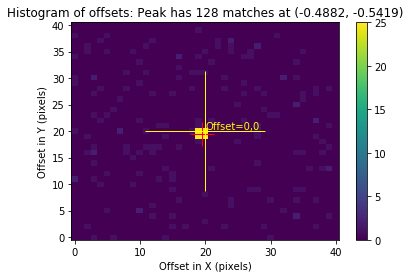

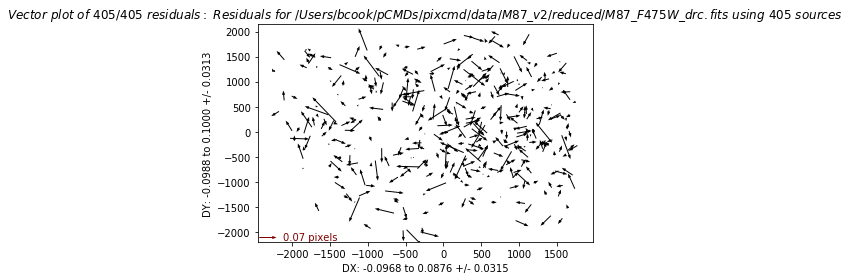

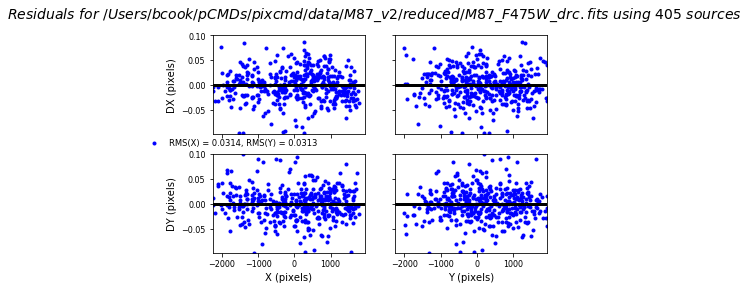

In [15]:
tweakreg.TweakReg([outputs['F814W'], outputs['F475W']], conv_width=4.0, threshold=100, nclip=10, shiftfile=False, writecat=False, clean=True,
                 interactive=False, updatehdr=False)

In [17]:
# Create difference image to check alignment
f1 = fits.open(outputs['F814W'])
f2 = fits.open(outputs['F475W'])
data = f2['SCI'].data / f1['SCI'].data
hdulist = fits.HDUList([fits.PrimaryHDU(), fits.ImageHDU(data=data)])
hdulist.writeto(diff_im, overwrite=True)

# Automatic Source Extraction

In [18]:
ppy.data.alignment._add_flag(outputs['F814W'])
ppy.data.alignment._add_flag(outputs['F475W'])

In [19]:
%%time
box = 8
ppy.data.sources.estimate_background(outputs['F814W'], bkg_kwargs={'bw':box, 'bh':box})

CPU times: user 2min 3s, sys: 3.35 s, total: 2min 7s
Wall time: 2min 9s


In [20]:
%%time
ppy.data.sources.mask_sources_auto(outputs['F814W'], threshold=10.0)

CPU times: user 3.42 s, sys: 4.75 s, total: 8.16 s
Wall time: 13.5 s


# Manual Source Extraction

In [21]:
ppy.data.sources.mask_sources_manual(outputs['F814W'], '../data/M87/masks/M87_F814W.reg')

In [22]:
# compute regions using only source masks
ppy.data.sources._add_masked(outputs['F814W'], mask_flags=[ppy.data.utils.ALL_FLAGS['SEXTRACTOR'],
                                                            ppy.data.utils.ALL_FLAGS['MANUAL']])

# Combine Masks

In [23]:
ppy.data.utils.combine_flags(outputs)

# Compute Regions

In [24]:
regions = ppy.data.extraction.add_regions(outputs, '../data/M87/masks/M87_F814W_contours.reg', base_filter='F814W', xc=2815, yc=2600)

100%|██████████| 92/92 [08:47<00:00,  5.73s/it]


# Extract PCMDs

In [25]:
pcmds = ppy.data.extraction.save_pcmds(outputs, 'F814W', 'F475W', path='../data/M87_v2/pcmds/', name_append='M87_I_gI')

Filter: F814W
Observation Date: 53746 (MJD)
Vega ZeroPoint: 25.5274
AB ZeroPoint: 25.9556
ST ZeroPoint: 26.7919
Exposure Time: 2880.0
A pre-made filter is available
Filter: F475W
Observation Date: 52658 (MJD)
Vega ZeroPoint: 26.1753
AB ZeroPoint: 26.0828
ST ZeroPoint: 25.7720
Exposure Time: 750.0
A pre-made filter is available


/Users/bcook/pCMDs/pixcmd/pcmdpy/pcmdpy/simulation/gpu_utils.py:267: RuntimeWarning: invalid value encountered in log10
  return np.log10(array_in)
100%|██████████| 364/364 [00:49<00:00,  7.39it/s]


In [21]:
pcmds.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

# Check

In [13]:
pcmds = {}
for i in tqdm(range(1, 341)):
    filename = f'../data/M87_v2/pcmds/M87_I_gI_{i}.pcmd'
    try:
        pcmds[i] = np.loadtxt(filename, unpack=True)
    except OSError:
        continue
    if len(pcmds[i]) == 0:
        pcmds.pop(i)
        os.remove(filename)

100%|██████████| 340/340 [00:37<00:00,  8.98it/s]


In [14]:
keys = np.array(list(pcmds.keys()))

In [15]:
keys

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [16]:
Neffs = {i: np.sqrt(pcmds[i].shape[1]) for i in pcmds.keys()}

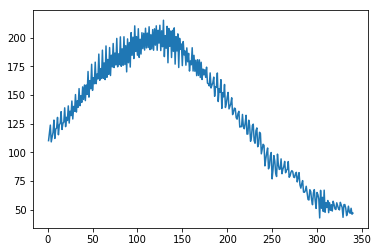

In [17]:
plt.plot(Neffs.keys(), Neffs.values())

In [18]:
f = ppy.instrument.m87_filters_v2(1.0)
iso_model = ppy.isochrones.Isochrone_Model(f)

In [19]:
dmod = 31.0

In [20]:
ppy.distancemodels.dmod_to_mpc(dmod)

15.848931924611142

In [21]:
driv = ppy.driver.Driver(iso_model, gpu=False)

In [22]:
gal_3 = ppy.galaxy.SSPSimple(np.array([0., -2., 3., 10.]), dmod=dmod)
gal_4 = ppy.galaxy.SSPSimple(np.array([0., -2., 4., 10.]), dmod=dmod)
gal_5 = ppy.galaxy.SSPSimple(np.array([0., -2., 5., 10.]), dmod=dmod)
gal_6 = ppy.galaxy.SSPSimple(np.array([0., -2., 6., 10.]), dmod=dmod)

In [23]:
sky = [292.8, 43.4]

In [24]:
pcmd_3, _ = driv.simulate(gal_3, 256, sky_noise=sky)
pcmd_4, _ = driv.simulate(gal_4, 256, sky_noise=sky)
pcmd_5, _ = driv.simulate(gal_5, 256, sky_noise=sky)
pcmd_6, _ = driv.simulate(gal_6, 256, sky_noise=sky)

In [25]:
is_dark = False
for i in tqdm(np.unique((keys-1)//4)):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8), sharex=True, sharey=True)
    axes = [axes[0,1], axes[0,0], axes[1,0], axes[1,1]] # 4 quadrants
    for j in range(4):
        k = j + 1 + 4*i
        if k not in pcmds:
            continue
        pcmd = pcmds[k]
        if len(pcmd[0]) <= 10:
            continue
        ppy.plotting.plot_pcmd(pcmd, ax=axes[j])
        ppy.plotting.plot_pcmd_contours(pcmd_3, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_4, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_5, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_6, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        axes[j].set_title('Region {:d}, Neff = {:.0f}'.format(k, np.sqrt(pcmd.shape[1])))
        ppy.plotting.plot_isochrone(iso_model, dmod=30.25, axes=axes[j], mag_system='vega')
        axes[j].axhline(y=f[0].counts_to_mag(sky[0]), color='r', ls='--')
    axes[0].set_xlim([0, 3])
    axes[0].set_ylim([31, 22])
    plt.tight_layout()
    try:
        plt.savefig(f'figures/M87_v2/M87_s{i}_pcmds.pdf')
    except TypeError:
        pass
    plt.close()

100%|██████████| 85/85 [01:46<00:00,  1.26s/it]
